In [1]:
#hide
import pandas as pd
pd.set_option('precision', 2)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors_ = plt.get_cmap('Set2')(np.linspace(0, 1, 8))
colors_year = plt.get_cmap('magma')(np.linspace(0.5, 1, 5)[::-1][1:])

from IPython.core.pylabtools import figsize
from IPython.display import display
figsize(8, 5)

sys.path.insert(0, '../src/')
# loading custom modules
import preprocess
import plot

%load_ext watermark
%load_ext autoreload
%autoreload 2
%matplotlib inline

%watermark -d -t -u -v -g -r -b -iv -a "Hongsup Shin" 

numpy      1.19.4
pandas     1.1.4
matplotlib 3.3.3
seaborn    0.11.0
Hongsup Shin 
last updated: 2020-11-25 14:49:34 

CPython 3.7.8
IPython 7.19.0
Git hash: dd4dc878dd9edc9fee73df4f47ff35fd53bffbab
Git repo: https://github.com/hongsups/blog.git
Git branch: tji_ois


In [95]:
#hide
# specify the custom font to use
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Lato'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.titlesize'] = 15
plt.rcParams['figure.titleweight'] = 'bold'

plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.edgecolor'] = 'white'
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

cols_race = ['#CE2827', '#3167AE', '#4C5151', '#B8BAB9']
cols_oag_tji = ['#929596', '#000000']
cols_gender = ['#183458', '#9b1f20']
cols_incident_causes = ['#000000', '#4c5151', '#6f7574', '#929596', '#b7bab9']
cols_year = cols_incident_causes[1:][::-1]
cols_deaths_injury = ['#9b1f20', '#183458']
cols_shot_deaths = ['#000000', '#9b1f20']
cols_bar = ['#6f7574']
cols_civilian_officer = ['#9b1f20', '#183458']

# Officer-involved Shootings in Texas

Texas law requires the **Office of the Attorney General (OAG)** to collect reports on all officer-involved shootings throughout Texas and then provide the summary of the individual reports in “The Peace Officer Involved Shooting Annual Reports.” The OAG digitally publishes these annual reports ([2019](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/2019_Annual_Report.pdf), [2018](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/Officer-Involved-Shootings-2018-Annual-Report.pdf), [2017](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/OfficerInvolvedShootingsAnnualReport2017.pdf), and [2016](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/OfficerInvolvedShootingsAnnualReport2016.pdf)), which are extremely high-level summaries, with no findings or analysis of trends or intersectionality. For instance,

- The OAG reports summarize data **only at the state level**, and omit any discussion about age demographics, report dates or the number of officers involved, for example.
- The OAG reports are **missing intersectional analyses** that would combine data characteris- tics, like demographics and severity of shootings.
- The OAG reports are also **static**, so any amendments to reports, or reports that are filed post-due.
- The OAG reports **do not provide details on how the data are processed**, cleaned and accumulated for the reports. The lack of this information reduces the usability and transparency of the data.

As a volunteer data scientist at Texas Justice Initiative (TJI), I decided to address these points and conduct independent analyses. I reviewed the officer-involved shooting incidents data from law enforcement agencies in Texas between 2016 and 2019, and we publised [a comprehensive report](https://texasjusticeinitiative.org/publications/officer-involved-shootings-in-texas) this August. This TJI publication improves upon the OAG’s annual reports by providing in-depth analyses with more granular information. This notebook shows the Data Insight section of the report which provides our independent analysis of the officer-involved shootings, including notable patterns in the data.

In short, our independent analysis on four years’ worth of officer-involved shooting reports slices the data across many variables: **demographics, location, year, and incident cause**. We also utilized data from the **U.S. Census Bureau** and **Texas Department of State Health Services** to compare the representation of demographics between general populations and the civilians in the officer-involved shooting incidents.

## Data: Officer-involved shooting (OIS)

By definition, officer-involved shootings (OIS) refer to shootings **of** and **by** law enforcement officers. In the data, every record in the officer-involved shooting data represents **either a civilian or an officer who was shot.** This means every person in the dataset was shot and harmed. Currently the data represents the severity of the shooting as binary information: **injury or death.** For the majority of the analyses, we focus on two populations: officers and civilians. We refer to the individuals who were injured or killed in shootings as **“civilians shot”** or **“officers shot.”** Those who were killed in shootings are referred to in our report as **“civilian deaths”** or **“officer deaths.”**

The datasets contain demographic and incident-related **features** of OIS incidents. For instance, the data has demographic features such as name, gender (binary), race, age at the time of incident. In terms of incident information, it contains information about severity (injured or killed), location, time and date of incidents. The data also has information about which law enforcement agencies have filed the OIS reports.

One of the main criticism on the state's OAG reports is that it does not reveal any information on how they preprocessed or cleaned the raw data. To address this, I created a detailed notebook to walk through how we curated the raw dataset (csv files). You can find the **preprocessing notebooks** in [TJI's GitHub repository](https://github.com/texas-justice-initiative/officer_involved_shooting_report_2020/tree/master/Notebooks).

In [96]:
#hide
## TJI data
df_cd = pd.read_pickle('https://github.com/texas-justice-initiative/officer_involved_shooting_report_2020/blob/master/Data/Preprocessed/civilian_shooting_preprocessed.pkl?raw=true')
df_os = pd.read_pickle('https://github.com/texas-justice-initiative/officer_involved_shooting_report_2020/blob/master/Data/Preprocessed/officer_shooting_preprocessed.pkl?raw=true')

## OAG data
df_oag = pd.read_csv('https://raw.githubusercontent.com/texas-justice-initiative/officer_involved_shooting_report_2020/master/Data/Interim/OAG_report_summary.csv', 
                     index_col=0)
df_oag.columns = df_oag.columns.astype(int)

## Data: References

To understand the context of the OIS data, we decided to use a couple of datasets as our reference points. First, we used [2010 Census](https://demographics.texas.gov/Data/TPEPP/Estimates/) data to compare its race demographics against that from the civilian dataset. We used a dataset with population counts that is grouped by race, gender, and age. You can find the preprocessed census dataset in [our repository](https://github.com/texas-justice-initiative/officer_involved_shooting_report_2020/tree/master/Data/Interim).

In [97]:
#hide
df_census = pd.read_pickle('https://github.com/texas-justice-initiative/officer_involved_shooting_report_2020/blob/master/Data/Interim/census_county_race_2010.pkl?raw=true')
df_census_pct = preprocess.pct(df_census, axis=1)

Since the OIS data has severity information, it's possible to compare the data about those who were killed during the incidents to the morality data from general population. To do so, we used morality data provided by Texas Department of State Health Services. We used [death counts by race, gender and age (2013)](https://www.dshs.texas.gov/chs/vstat/vs13/t26a.aspx) and [death counts by county (2013)](https://www.dshs.texas.gov/chs/vstat/vs13/t26b.aspx).

In [98]:
#hide
df_death_age_male = pd.read_csv('https://raw.githubusercontent.com/texas-justice-initiative/officer_involved_shooting_report_2020/master/Data/Raw/Census/mortality_rate_by_age_male.csv',
                                index_col='Age').iloc[1:, :]
df_death_county = pd.read_csv('https://raw.githubusercontent.com/texas-justice-initiative/officer_involved_shooting_report_2020/master/Data/Raw/Census/mortality_rate_by_county.csv',
                              index_col='County')

In [99]:
#hide
# Defining commonly used dataframes for convenience
race_list = ['WHITE', 'BLACK', 'HISPANIC', 'OTHER']
incident_causes_list = ['Traffic Stop', 
                        'Emergency/Request for Assistance', 
                        'Execution of a Warrant', 
                        'Hostage/Barricade/Other Emergency', 
                        'Other']
years = range(2016, 2020)
age_range_names = df_death_age_male.index.values

# civilians who got shot and died
df_cd_died = df_cd[df_cd['died']==1].copy()

# civilians who got shot in harris county
df_cd_harris = df_cd[df_cd['incident_county']=='HARRIS'].copy()

# counties with most incidents (top 5)
top5_locs = df_cd['incident_county'].value_counts()[:5].index.values
df_cd_top5 = df_cd.loc[df_cd['incident_county'].isin(top5_locs), :]
df_os_top5 = df_os.loc[df_os['incident_county'].isin(top5_locs), :]

## The OAG annual reports vs. TJI multi-year datasets
The total number of civilians shot by officers in Texas from 2016 to 2019 is identical in the OAG reports and TJI datasets (697 incidents). However, the totals from individual years are slightly different (Fig. 1).

In [100]:
#hide
df_oag_sum = df_oag.loc[['C-DEATH', 'C-INJURY'], :].sum(axis=0)
df_cd_sum = df_cd.groupby('year')['date_incident'].count()
df_oga_cd_sum = pd.concat([df_oag_sum, df_cd_sum], axis=1)
df_oga_cd_sum.columns = ['OAG', 'TJI']

diffs = ['+{}'.format(diff) if diff>0 else str(diff) for diff in (df_cd_sum - df_oag_sum)]

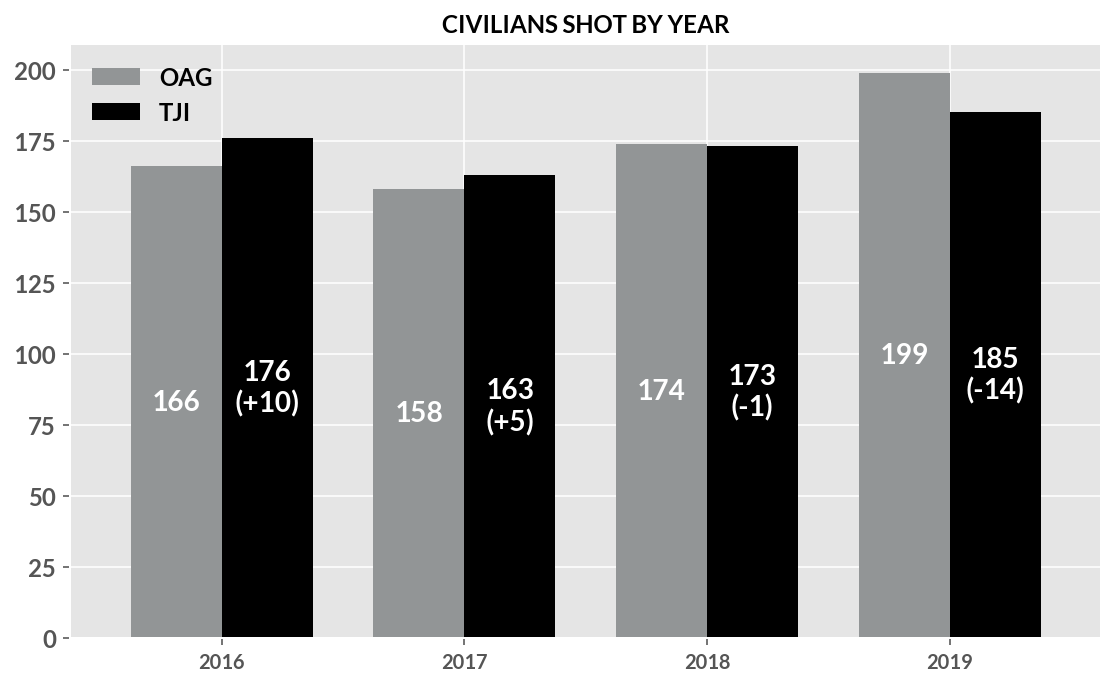

In [101]:
#hide_input
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df_oga_cd_sum.plot.bar(width=0.75, color=cols_oag_tji, ax=ax, rot=0, legend=False)

# ax.legend(['OAG', 'TJI'], loc='upper left')
ax.set_xticklabels(years, fontsize=10)
ax.set(title='Civilians Shot by Year'.upper())

# annotating
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if i < 4:
        ax.text(x+width/2, y+height/2, '{:.0f}'.format(height), color='white', fontsize=14,
                horizontalalignment='center', verticalalignment='center')        
    else:
        ax.text(x+width/2, y+height/2, '{:.0f}\n({})'.format(height, diffs[i-4]), color='white', fontsize=14,
                horizontalalignment='center', verticalalignment='center')        

ax.legend(loc=2)
fig.tight_layout()

The discrepancy within each year is smaller in the number of officers who were shot. In both 2018 and 2019, TJI’s data shows one more shooting of an officer each year as compared to the OAG reports. The discrepancy should not be ignored but since the mismatch is marginal, we did not illustrate it with a chart.

In [102]:
#hide
df_oag_os_sum = df_oag.loc[['O-DEATH', 'O-INJURY'], :].sum(axis=0)
df_os_sum = df_os.groupby('year').count()['date_incident']
print(df_os_sum-df_oag_os_sum)

year
2016    0
2017    0
2018    1
2019    1
dtype: int64


## Increasing deaths and decreasing survival rate

As previously shown in Fig. 1, the number of civilians injured or killed in officer-involved shootings has been increasing for the past four years: the total number of civilians shot in 2019 increased by 25.9% compared to 2017, and 14.4% compared to 2018. When analyzed by severity type (injury or death), the data shows that every year, more civilians were killed in shootings (Fig. 15A).
The total number of civilian deaths increased by 30.1% in 2019 (108 deaths) compared to 2016 and 2017 (83 deaths), and by 5.88% compared to 2018 (102 deaths). However, the total number of civilians who were injured decreased by 17.2% in 2019 (77 injured) compared to 2016 (93 injured).
This naturally leads to a decreased survival rate, a rate that represents the ratio of civilians who were fatally shot to the total number of all civilians shot (Fig. 15B). By 2019, the survival rate of civilians was less than 50%.

In [103]:
#hide
print(df_oag_sum.loc[2019]/df_oag_sum.loc[2017])
print(df_oag_sum.loc[2019]/df_oag_sum.loc[2018])

1.259493670886076
1.1436781609195403


In [104]:
#hide
df_cd_year_died = df_cd.groupby(['year', 'civilian_died'])['date_incident'].count().unstack()

In [105]:
#hide
df_cd_year_died.loc[2019, 'DEATH']/df_cd_year_died.loc[2016, 'DEATH']

1.3012048192771084

In [106]:
#hide
df_cd_year_died_pct = preprocess.pct(df_cd_year_died, 1)

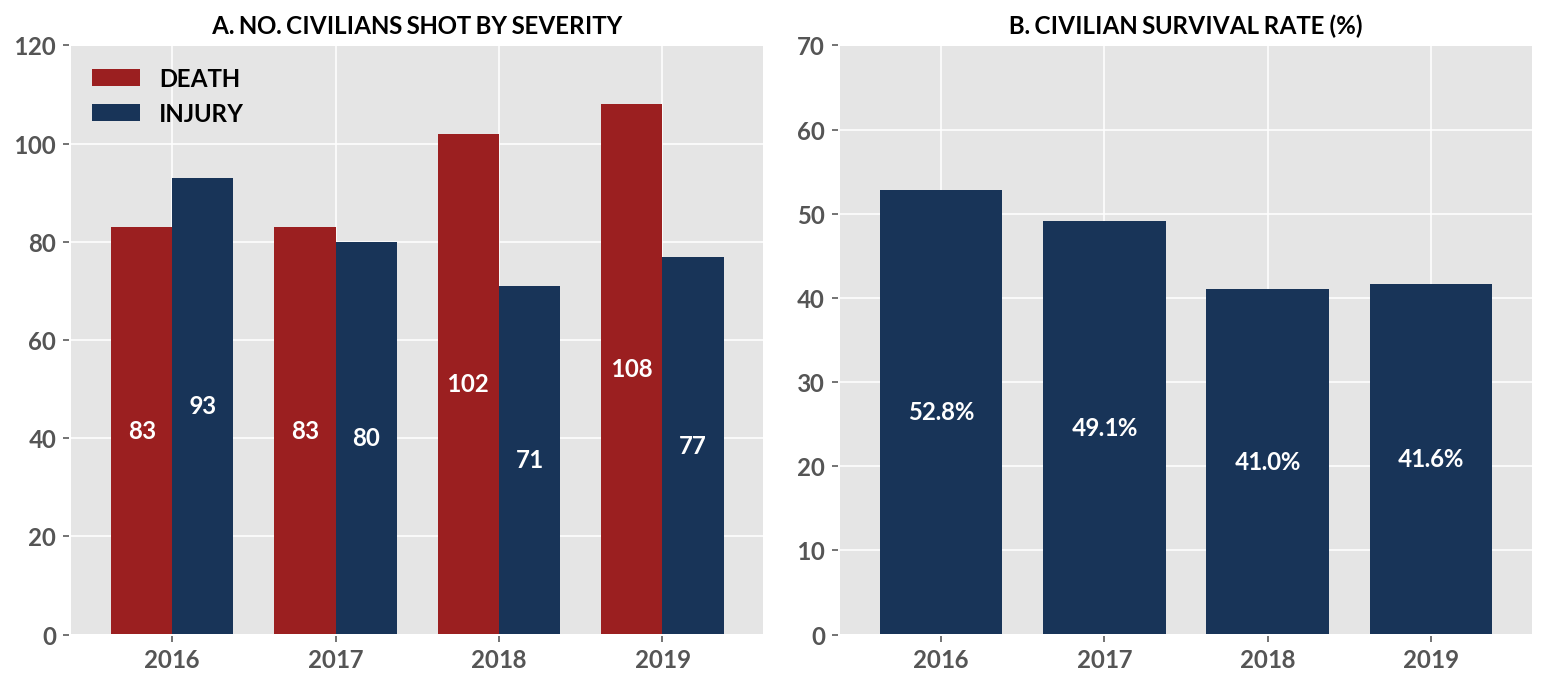

In [153]:
#hide_input
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
df_cd_year_died.plot.bar(color=cols_deaths_injury, legend=False, rot=0, ylim=(0, 120), width=0.75, ax=axes[0])

for i, p in enumerate(axes[0].patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[0].text(x+width/2, y+height/2, '{:.0f}'.format(height), color='white', fontsize=12,
                 horizontalalignment='center', verticalalignment='center')        
axes[0].set(title='A. No. Civilians Shot by Severity'.upper(), xlabel='')
axes[0].legend(loc='upper left')

df_cd_year_died_pct['INJURY'].plot.bar(color=cols_deaths_injury[1], legend=False, rot=0, ylim=(0, 70), ax=axes[1], width=0.75)
plot.annotate(axes[1], 'v', unit='percent', fontsize=12)
axes[1].set(title='B. Civilian Survival Rate (%)'.upper(), xlabel='')
axes[1].set_xticklabels(years)

fig.tight_layout()

## Survival rate of officers almost x2 as high as civilians'

Across all four years, the survival rate of civilians is 46.1% but that of officers is 83.1%. In other words, the officers’ survival rate is almost twice (1.80 times) as high as that of civilians’ survival rate. This trend was consistent throughout the years (Fig. 16A) and in Texas’ five most populous counties, Harris, Bexar, Dallas, Tarrant, and Travis (Fig. 16B). In Fig. 16A, the relatively stable officer survival rate is contrasted with the decreasing civilian survival rate.

In [108]:
#hide
civilian_survival_rate_by_year = preprocess.pct(df_cd.groupby(['civilian_died', 'year'])['date_incident'].count().unstack(), 0).loc['INJURY']
officer_survival_rate_by_year = preprocess.pct(df_os.groupby(['officer_harm', 'year'])['date_incident'].count().unstack(), 0).loc['INJURY']
survival_rate_by_year = pd.concat([civilian_survival_rate_by_year, officer_survival_rate_by_year], axis=1)
survival_rate_by_year.columns = ['Civilian', 'Officer']

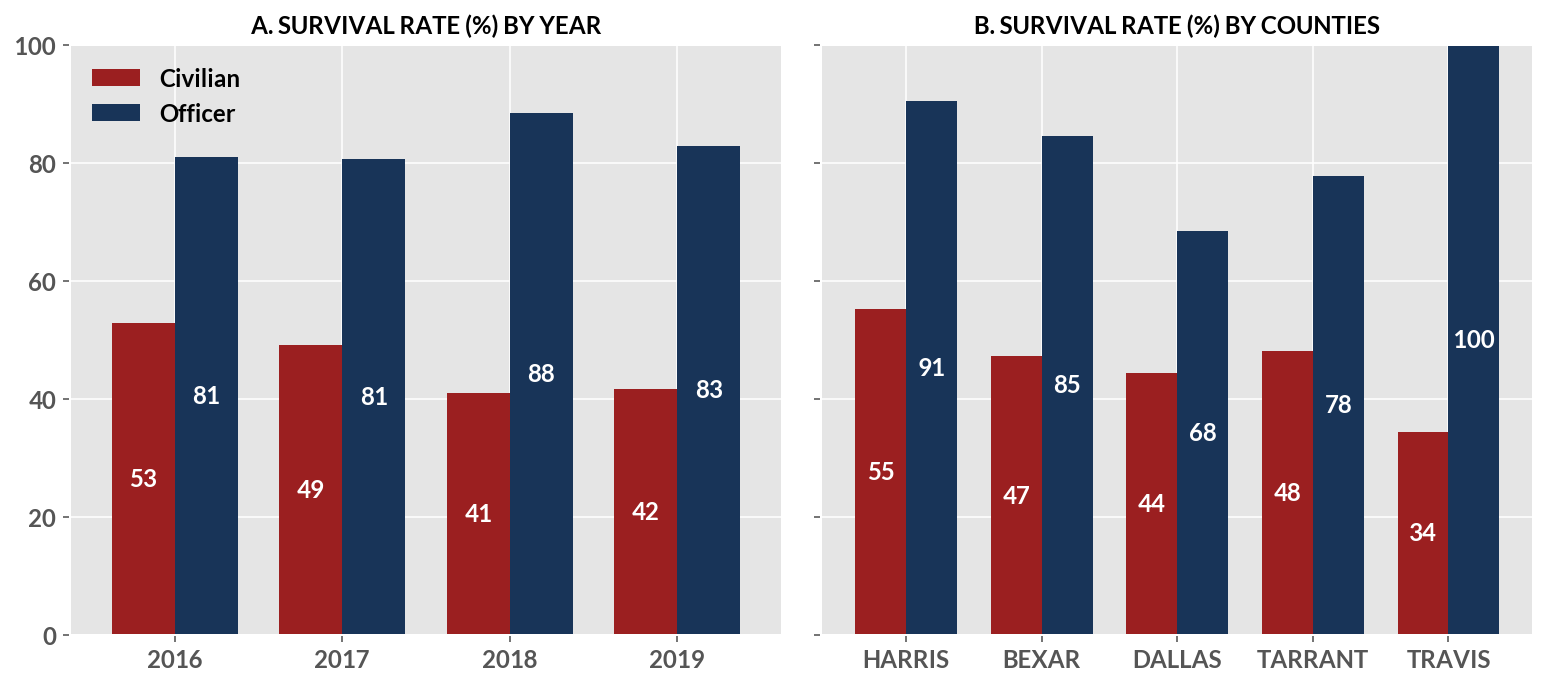

In [117]:
#hide_input
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

survival_rate_by_year.plot.bar(ax=axes[0], rot=0, legend=False, color=cols_civilian_officer, width=0.75)
plot.annotate(axes[0], 'v', fontsize=12)
axes[0].set(ylim=(0, 100), xlabel=None, ylabel=None)
axes[0].set_xticklabels(years, fontsize=10)

topN = df_cd['incident_county'].value_counts()[:5].index
temp_cd = df_cd.groupby(['civilian_died', 'incident_county'])['date_incident'].count().unstack().loc[:, topN].T
temp_os = df_os.groupby(['officer_harm', 'incident_county'])['date_incident'].count().unstack().loc[:, topN].T
survival_rate_top5 = pd.concat([temp_cd['INJURY']/temp_cd.sum(axis=1)*100,
                                temp_os['INJURY']/temp_os.sum(axis=1)*100], axis=1)
survival_rate_top5.columns = ['Civilian', 'Officer']
survival_rate_top5.plot.bar(rot=0, width=0.75, ax=axes[1], color=cols_civilian_officer, legend=False)
axes[0].set_xticklabels(years, fontsize=12)
plot.annotate(axes[1], 'v', fontsize=12)

axes[0].set_title('A. Survival Rate (%) by Year'.upper())
axes[1].set_title('B. Survival Rate (%) by Counties'.upper())
axes[0].legend(loc='upper left')

fig.tight_layout()

## Overrepresentation of Black people in metropolitan counties

At the state level, most of the civilians shot by law enforcement were white (Fig. 17A). However, if we focus on Texas’ five most populous counties, we see that non-white civilians were shot more often than white civilians every year (Fig. 17B). This reverse trend is also found within the death counts. Almost every year, the number of white civilians fatally shot by law enforcement in these populous counties was less than the number of Black or Hispanic civilians fatally shot by law enforcement.

In [110]:
#hide
df_cd_race_survival_year = df_cd.groupby(['civilian_race', 'civilian_died', 'year'])['date_incident'].count().unstack().fillna(0)

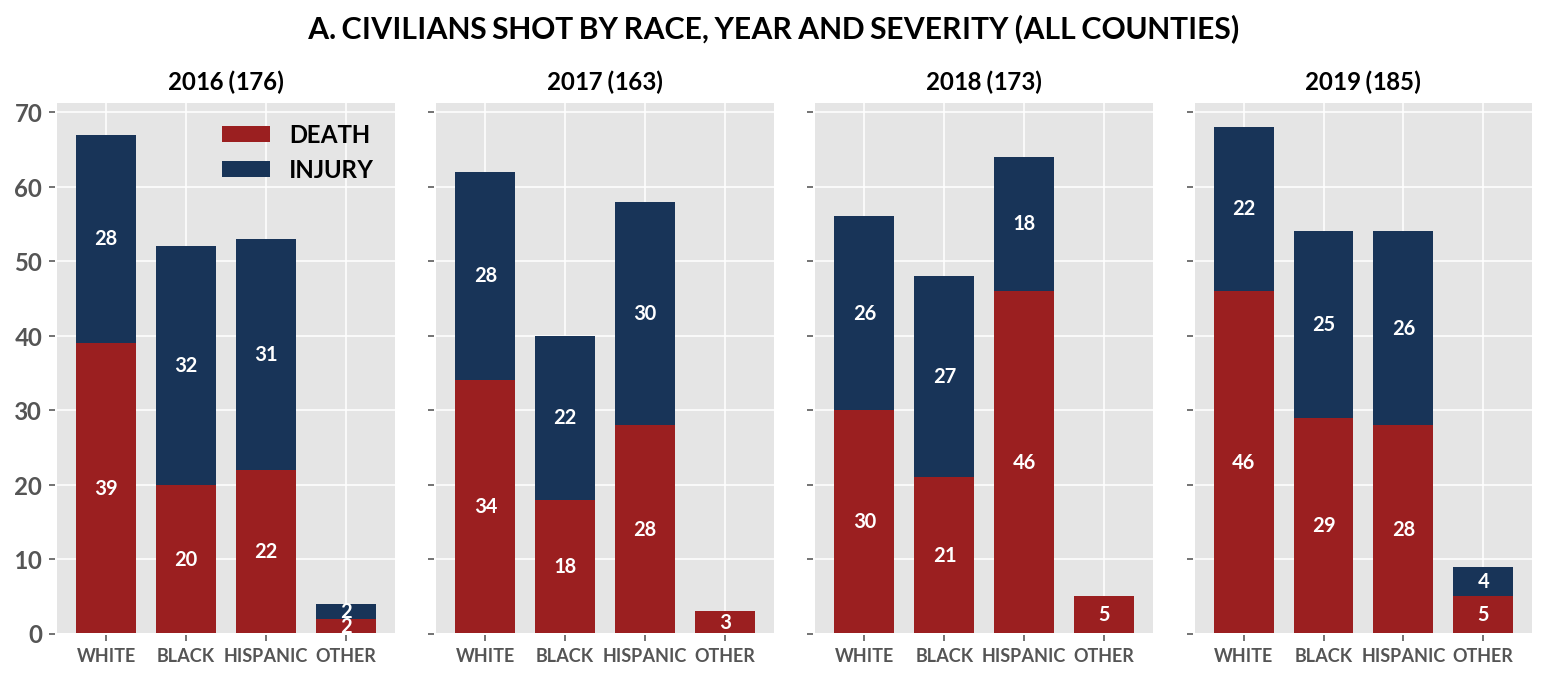

In [111]:
#hide_input
fig, axes = plt.subplots(1, len(years), figsize=(11, 5), sharey=True)

for i, (year, ax) in enumerate(zip(years, axes)):
    df_cd_race_survival_year[year].unstack().loc[race_list, :].plot.bar(
        stacked=True, color=cols_deaths_injury, legend=False, width=0.75, rot=0, ax=ax)
    plot.annotate(ax, 'v', fontsize=10)
    ax.set(xlabel='', title='{} ({})'.format(year, (df_cd['year']==year).sum()))
    ax.set_xticklabels(race_list, fontsize=9)
axes[0].legend(['DEATH', 'INJURY'])
fig.suptitle('A. Civilians shot by race, year and severity (all counties)'.upper(), x=0.5, y=0.95)
fig.tight_layout()

In [113]:
#hide
df_cd_race_survival_year_top5 = df_cd_top5.groupby(['civilian_race', 'civilian_died', 'year'])['date_incident'].count().unstack().fillna(0)

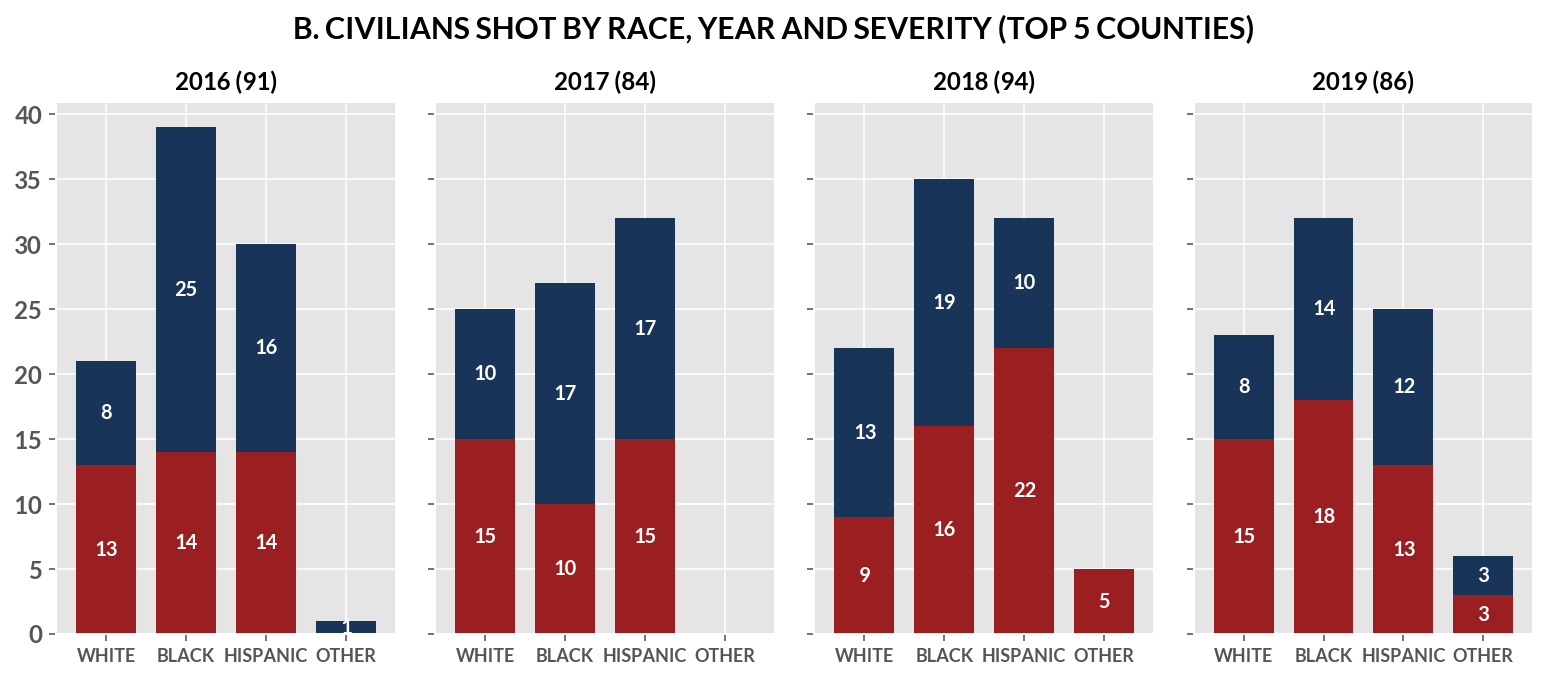

In [115]:
#hide_input
fig, axes = plt.subplots(1, len(years), figsize=(11, 5), sharey=True)

for i, (year, ax) in enumerate(zip(years, axes)):
    df_cd_race_survival_year_top5[year].unstack().loc[race_list, :].plot.bar(
        stacked=True, color=cols_deaths_injury, legend=False, width=0.75, rot=0, ax=ax)
    plot.annotate(ax, 'v', fontsize=10)
    ax.set(xlabel='', title='{} ({})'.format(year, df_cd_race_survival_year_top5[year].sum().astype(int)))
    ax.set_xticklabels(race_list, fontsize=9)    
fig.suptitle('B. Civilians shot by race, year and severity (top 5 counties)'.upper(), x=0.5, y=0.95)
fig.tight_layout()

In [40]:
#hide
race_all = df_cd['civilian_race'].value_counts().loc[race_list]
race_top5 = df_cd_top5['civilian_race'].value_counts().loc[race_list]

It is possible that this disparity reflects the concentrations of non-whites in the five most populous counties. However, when we compared the race demographics of the general population of the five most populous counties (2018 Estimated Population of Texas, Texas Demographic Center) to that of the civilians shot by law enforcement officers, we still found overrepresentation of Black civilians in all five counties (Fig. 18). For example, Black people account for just about 18.5% of Harris County’s population. But almost half (48.5%) of all civilians shot during officer-involved shootings in Harris County from 2016 to 2019 were Black individuals, meaning Black people were overrepresented at a rate of 2.62.

In [61]:
#hide
df_cd_race_county_top5_pct = preprocess.crosstab_by_topN_cities(df_cd, 'civilian_race', 'incident_county', N=5, ratio=True)*100
df_cd_race_county_top5_total = preprocess.crosstab_by_topN_cities(df_cd, 'civilian_race', 'incident_county', N=5, ratio=False)['TOTAL']
df_census_top5_pct = df_census_pct.loc[df_cd_race_county_top5_pct.index, :]

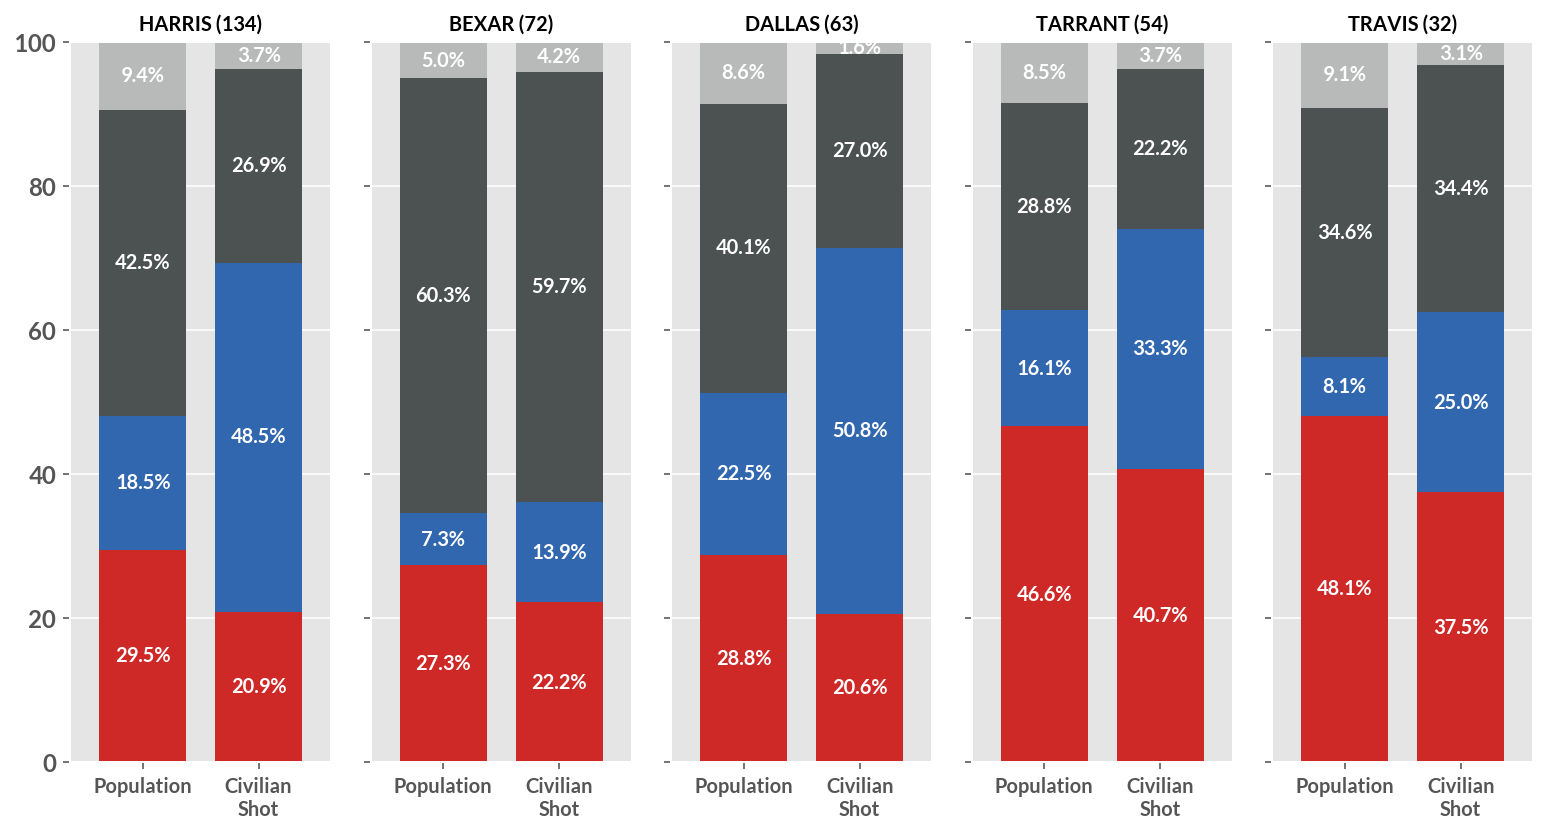

In [121]:
#hide_input
plot.plot_stackedbar_compare_ratio(df_cd_race_county_top5_pct, 
                                   df_census_top5_pct, 
                                   df_cd_race_county_top5_total, 
                                   legend=False,
                                   figsize=(11, 6))

## Overrepresentation of non-white people in metropolican counties

We found overrepresentation of non-white civilians (Fig. 19) when we compared the officer-involved shooting data to the mortality data (2013 Texas Department of State Health Services Crude Death Rates by County of Residence and Race Ethnicity). In this comparison, we only focused on male civilian deaths because female civilian deaths only account for 7% of all officer-involved shootings of civilians.

According to the mortality data, in Harris County, about 23.7% of all individuals who die in a given year are Black people. However, Black civilians account for 41.1% (overrepresented at a rate of 1.73) of all civilians killed in officer-involved shootings (Fig. 19). In Bexar County, Hispanic people account for 45.1% of deaths in the general population, but 70.6% of civilians killed in officer-involved shootings (overrepresented at a rate of 1.57).

In [123]:
#hide
df_death_female = df_cd.loc[(df_cd['civilian_died']=='DEATH') & (df_cd['civilian_gender']=='FEMALE')]
df_cd_death_age_female = pd.crosstab(df_death_female['civilian_age_binned'], df_death_female['civilian_race'])

In [124]:
#hide
df_cd_died['civilian_gender'].value_counts()/df_cd_died['civilian_gender'].value_counts().sum()

MALE      0.93
FEMALE    0.07
Name: civilian_gender, dtype: float64

In [125]:
#hide
df_census_died_top5_pct = (preprocess.pct(df_death_county.drop('TOTAL', axis=1), 1)).loc[top5_locs, :]
df_cd_died_male = df_cd_died.loc[df_cd['civilian_gender']=='MALE', :]
df_cd_died_male_top5 = df_cd_died_male.groupby(['incident_county', 'civilian_race'])['date_incident'].count().unstack().fillna(0).loc[top5_locs, race_list]
df_cd_died_male_top5_pct = preprocess.pct(df_cd_died_male_top5, 1)

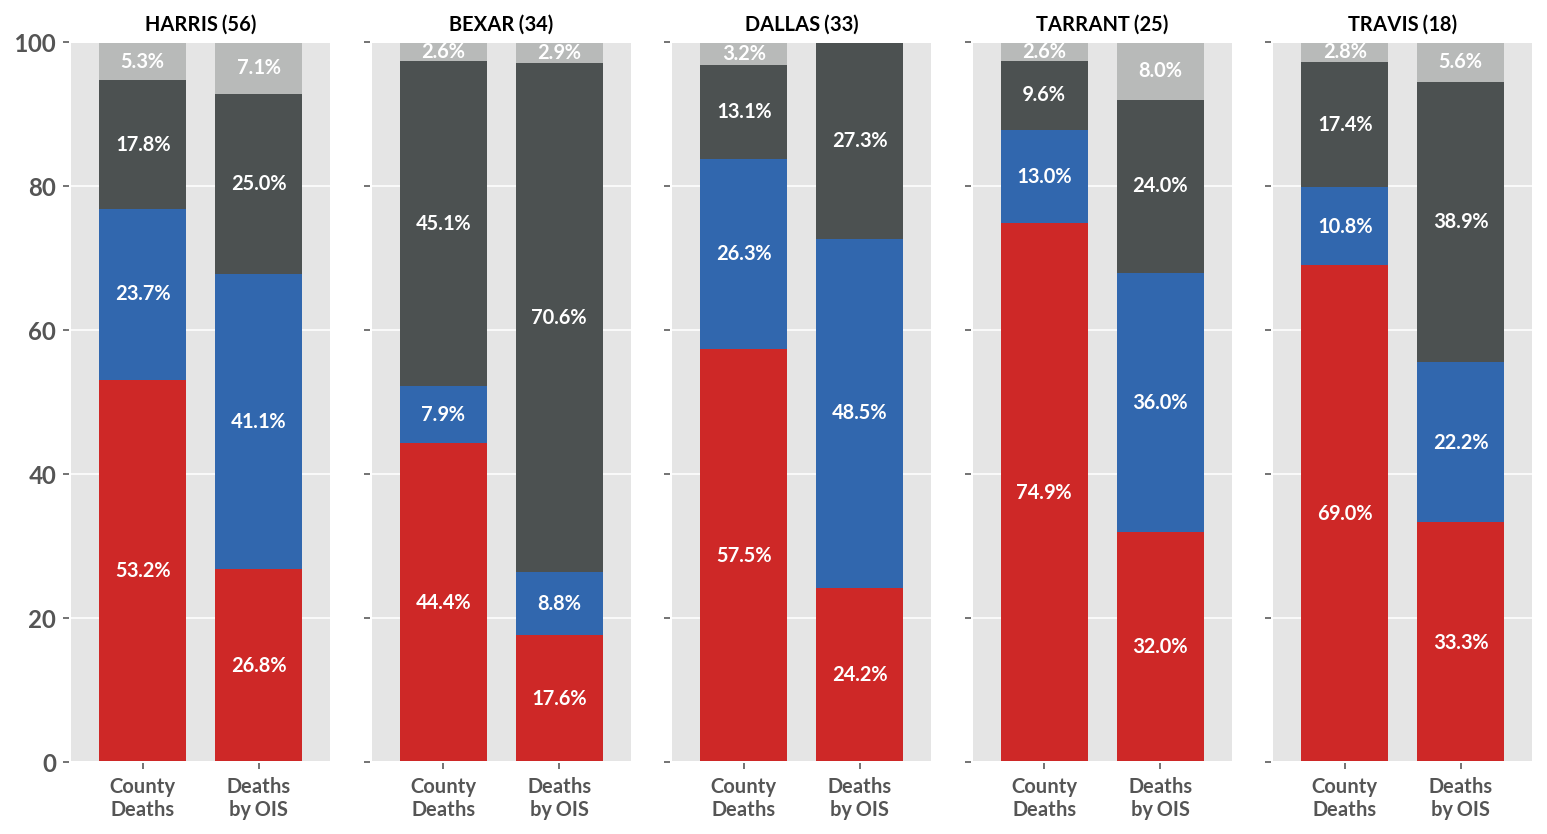

In [134]:
#hide_input
plot.plot_stackedbar_compare_ratio(df_cd_died_male_top5_pct,
                                   df_census_died_top5_pct,
                                   df_cd_died_male_top5.sum(axis=1).astype(int),
                                   severity='Deaths', 
                                   legend=False,
                                   figsize=(11, 6))

## Overrepresentation of young Black men in OIS killing

When comparing the demographics of individuals who were fatally shot by law enforcement to demographic information in the state’s mortality data (2013 Texas Department of State Health Services Age-Adjusted Death Rates by Race Ethnicity and Gender), we discovered that deaths of Black men ages 15-24 were overrepresented in fatal officer-involved shootings (overrepresented at a rate of 2.96, Fig. 20). This disparity disappears in the older categories (e.g., ages 45-54 and 55-64).

In [129]:
#hide
df_cd_died_male_age = df_cd_died.loc[df_cd_died['civilian_gender']=='MALE'].groupby(['civilian_age_binned', 'civilian_race'])['date_incident'].count().unstack().fillna(0)[race_list]
df_cd_died_male_age_pct = preprocess.pct(df_cd_died_male_age, 1)[race_list]

In [130]:
#hide
print(df_cd.loc[df_cd['civilian_age_binned']==2, 'civilian_age'].min())
print(df_cd.loc[df_cd['civilian_age_binned']==2, 'civilian_age'].max())

15.0
24.0


In [131]:
#hide
inds_age_binned = np.arange(2, 7)
df_cd_died_male_age_binned = df_cd_died_male_age.loc[inds_age_binned, :].drop('OTHER', axis=1)
df_death_age_male_binned = df_death_age_male.iloc[inds_age_binned, :].drop('TOTAL', axis=1)

df_cd_died_male_age_binned_pct = preprocess.pct(df_cd_died_male_age_binned, 1)
df_death_age_male_binned_pct = preprocess.pct(df_death_age_male_binned, 1)

df_cd_died_male_age_binned_pct.index = ['Age {}'.format(s) for s in age_range_names[inds_age_binned]]
df_death_age_male_binned_pct.index = ['Age {}'.format(s) for s in age_range_names[inds_age_binned]]

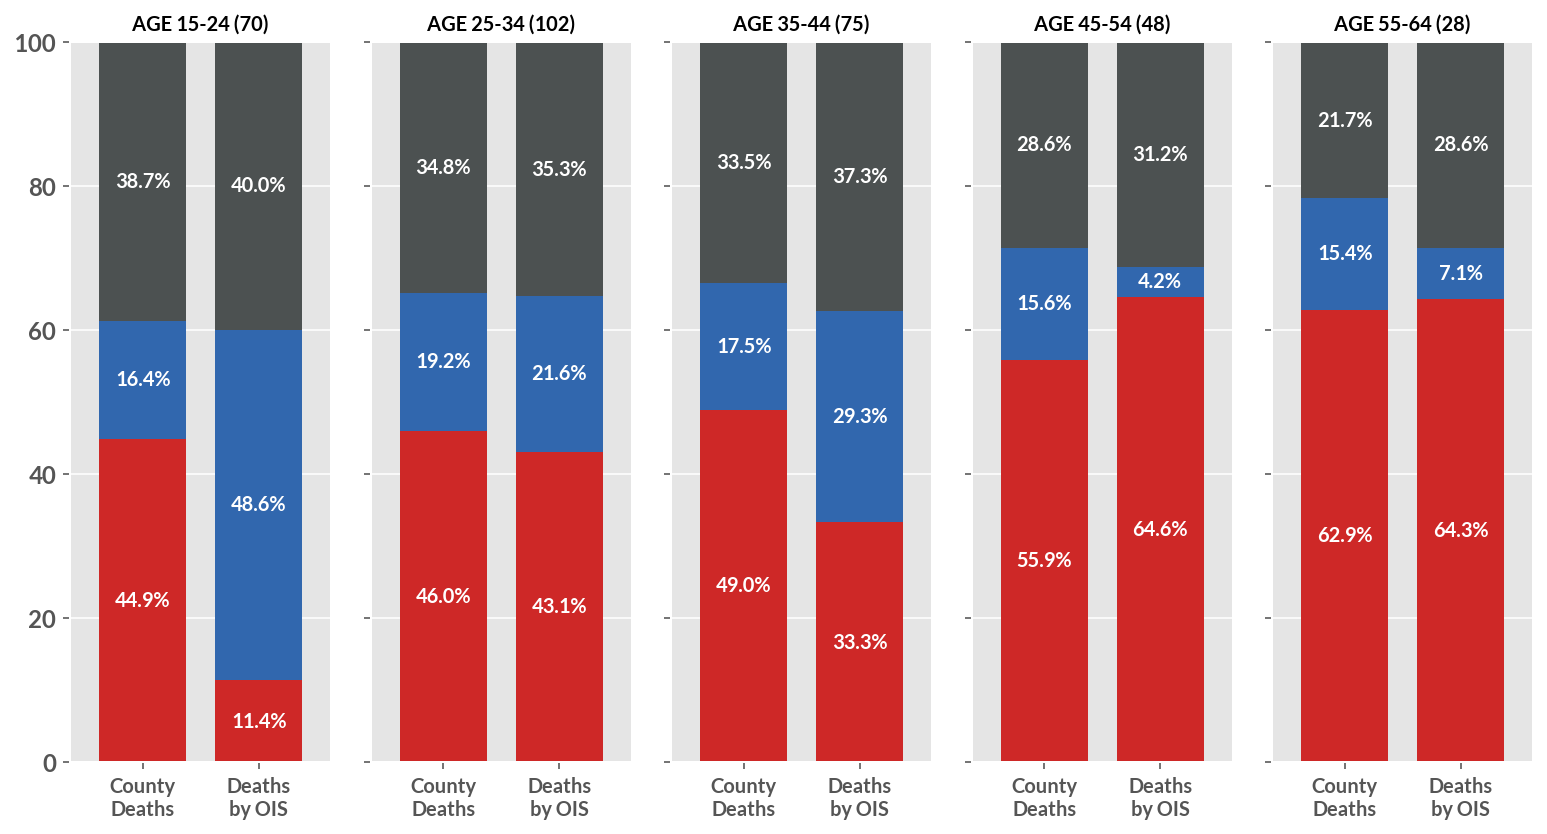

In [133]:
#hide_input
plot.plot_stackedbar_compare_ratio(df_cd_died_male_age_binned_pct,
                                   df_death_age_male_binned_pct,
                                   df_cd_died_male_age_binned.sum(axis=1).astype(int), 
                                   severity='Deaths', 
                                   legend=False,
                                   figsize=(11, 6))

Most of the deaths of young Black men occurred in Tarrant, Harris, and Travis counties (Fig. 21).

In [139]:
#hide
df_cd_black_youth_died = df_cd.loc[(df_cd['civilian_age_binned']==2) & 
                                   (df_cd['civilian_race']=='BLACK') &
                                   (df_cd['civilian_gender']=='MALE') &
                                   (df_cd['died']==1), :]
inds_in_order = df_cd_black_youth_died['incident_county'].value_counts().index
df_cd_black_youth_count_died = df_cd_black_youth_died.groupby(['incident_county', 'year'])['date_incident'].count().unstack().fillna(0)

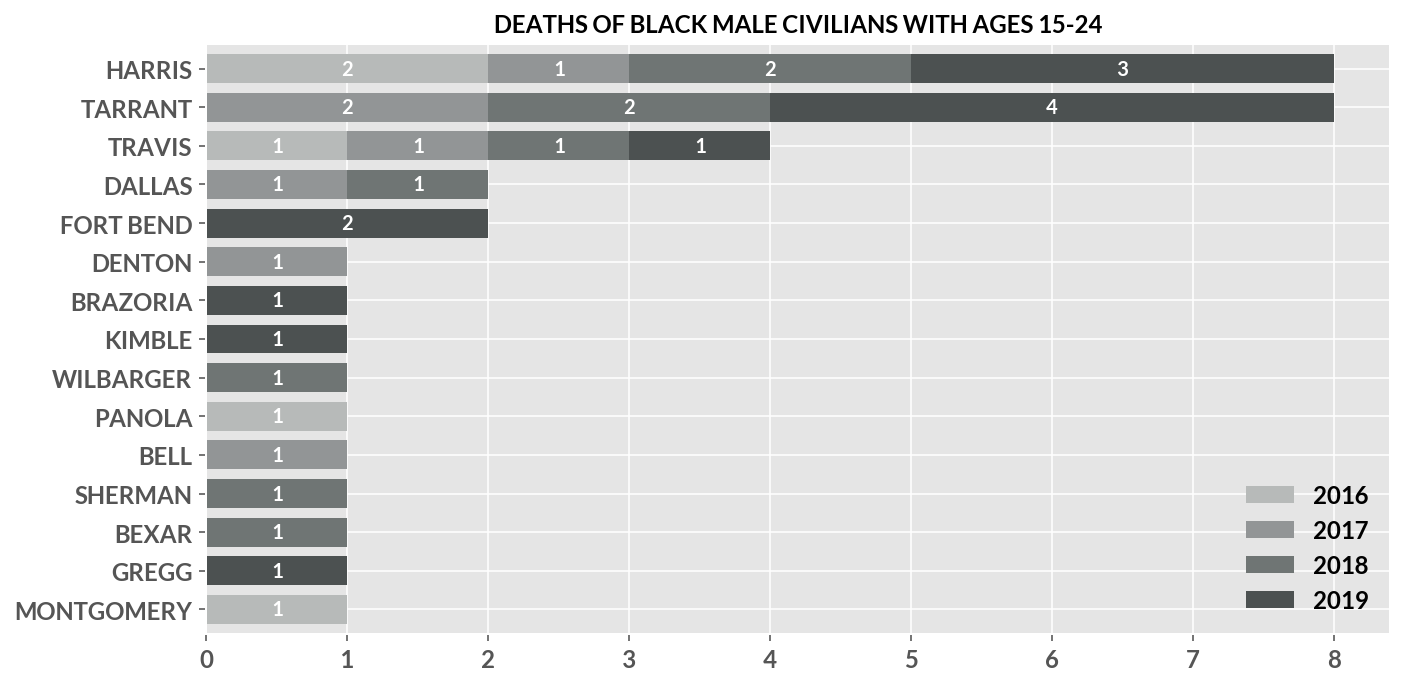

In [144]:
#hide_input
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_cd_black_youth_count_died.loc[inds_in_order[::-1], :].plot.barh(stacked=True, color=cols_year, width=0.75, ax=ax, legend=False)
plot.annotate(ax, 'h', threshold=0)
ax.set_title('Deaths of Black Male Civilians with Ages 15-24'.upper())

ax.legend()
fig.tight_layout()

In [145]:
#hide
df_cd_black_youth_count_died_detail = df_cd_black_youth_died[['civilian_race', 
                                                              'civilian_died', 
                                                              'civilian_name_full', 
                                                              'civilian_age',
                                                              'incident_county']].sort_values(by='civilian_age')

In [147]:
#hide_input
df_cd_black_youth_count_died_detail

,civilian_race,civilian_died,civilian_name_full,civilian_age,incident_county
308,BLACK,DEATH,JORDAN EDWARDS,15.0,DALLAS
301,BLACK,DEATH,DAEZION CHRISTIAN PAUL TURNER,15.0,BELL
695,BLACK,DEATH,ARIC RASHAD MOODY,16.0,HARRIS
303,BLACK,DEATH,KENDELL MARQUIS WILSON,16.0,HARRIS
82,BLACK,DEATH,DAVID JOSEPH,17.0,TRAVIS
716,BLACK,DEATH,BRANDON BELL,17.0,HARRIS
497,BLACK,DEATH,JESSE DARIAN CARRILLO,17.0,DALLAS
523,BLACK,DEATH,JALON GREGORY JOHNSON,17.0,HARRIS
224,BLACK,DEATH,ELIJAH MARK COBB,17.0,MONTGOMERY
709,BLACK,DEATH,AMARI MALONE,18.0,TARRANT


This disparity also shows up when we compared the age at the time of death. The median age at the time of death was lower for Black (age 29) and Hispanic (age 34) people than white people (age 38). This pattern was consistent over time (Fig. 22).

In [148]:
#hide
df_cd_died.groupby('civilian_race')['civilian_age'].median()[race_list]

civilian_race
WHITE       38.0
BLACK       29.0
HISPANIC    34.0
OTHER       37.0
Name: civilian_age, dtype: float64

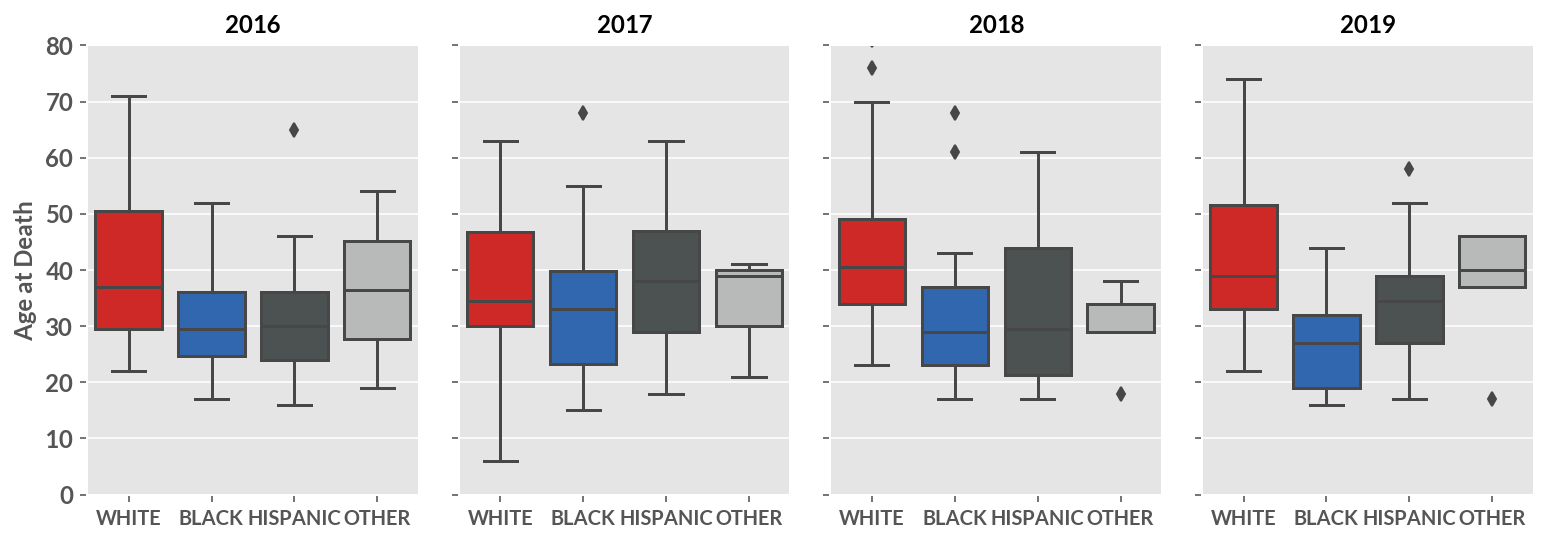

In [152]:
#hide_input
fig, axes = plt.subplots(1, len(years), figsize=(11, 4), sharey=True)
for i, (year, ax) in enumerate(zip(years, axes)):
    
    df_temp = df_cd_died[df_cd_died['year']==year]
    ax = sns.boxplot(x='civilian_race', y='civilian_age', data=df_temp, order=race_list, ax=ax)
    ax.set(ylim=(0, 80))
    if i == 0:
        ax.set_ylabel('Age at Death')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xticklabels(race_list, fontsize=10)
    ax.set_title(year)
    
    for i, col in enumerate(cols_race):
        mybox = ax.artists[i]
        mybox.set_facecolor(col)
    
fig.tight_layout()

# 6. Causes of incidents that precede shootings

## Categories

In [83]:
incident_causes_list

['Traffic Stop',
 'Emergency/Request for Assistance',
 'Execution of a Warrant',
 'Hostage/Barricade/Other Emergency',
 'Other']

In [84]:
incident_causes_list_sorted = df_cd[incident_causes_list].sum(axis=0).sort_values(ascending=False).index
print(incident_causes_list_sorted)

Index(['Emergency/Request for Assistance', 'Other', 'Traffic Stop',
       'Execution of a Warrant', 'Hostage/Barricade/Other Emergency'],
      dtype='object')


## Frequency per category

In [85]:
df_cd[incident_causes_list_sorted].sum()

Emergency/Request for Assistance     386
Other                                176
Traffic Stop                          88
Execution of a Warrant                71
Hostage/Barricade/Other Emergency     37
dtype: int64

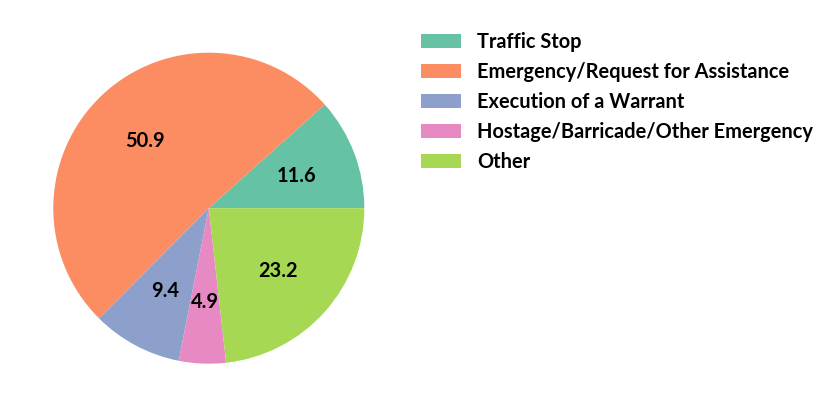

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
df_cd[incident_causes_list].sum().plot(kind='pie', autopct='%.1f', colors=colors_, labels=['','','','',''], ax=ax, fontsize=10)
ax.legend(incident_causes_list, bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(ylabel='')
fig.tight_layout();

Sanity check: OAG data

In [87]:
df_oag_incident_cause_counts = df_oag.iloc[-5:, :].sum(axis=1).loc[['TRAFFIC STOP', 'EMERGENCY CALL', 'EXECUTION OF A WARRANT', 
                                                                    'HOSTAGE, BARRICADE AND OTHER EMERGENCY', 'OTHER']]

In [88]:
df_oag_incident_cause_counts

TRAFFIC STOP                               93
EMERGENCY CALL                            342
EXECUTION OF A WARRANT                     79
HOSTAGE, BARRICADE AND OTHER EMERGENCY     95
OTHER                                     184
dtype: int64

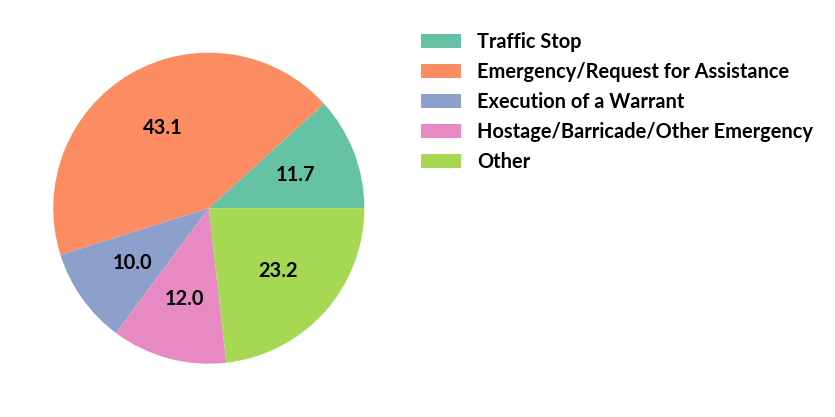

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
df_oag_incident_cause_counts.plot(kind='pie', autopct='%.1f', colors=colors_, labels=['','','','',''], ax=ax, fontsize=10)
ax.legend(incident_causes_list, bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(ylabel='')
fig.tight_layout();

Our data is not too different from OAG data except that we have more "Emergency" causes and fewer "Hostage" causes.

In [90]:
df_oag_incident_cause_counts.values - df_cd[incident_causes_list].sum().values

array([  5, -44,   8,  58,   8])

### FIGURE 23. SEVERITY OF CIVILIAN SHOOTINGS BY INCIDENT CAUSE

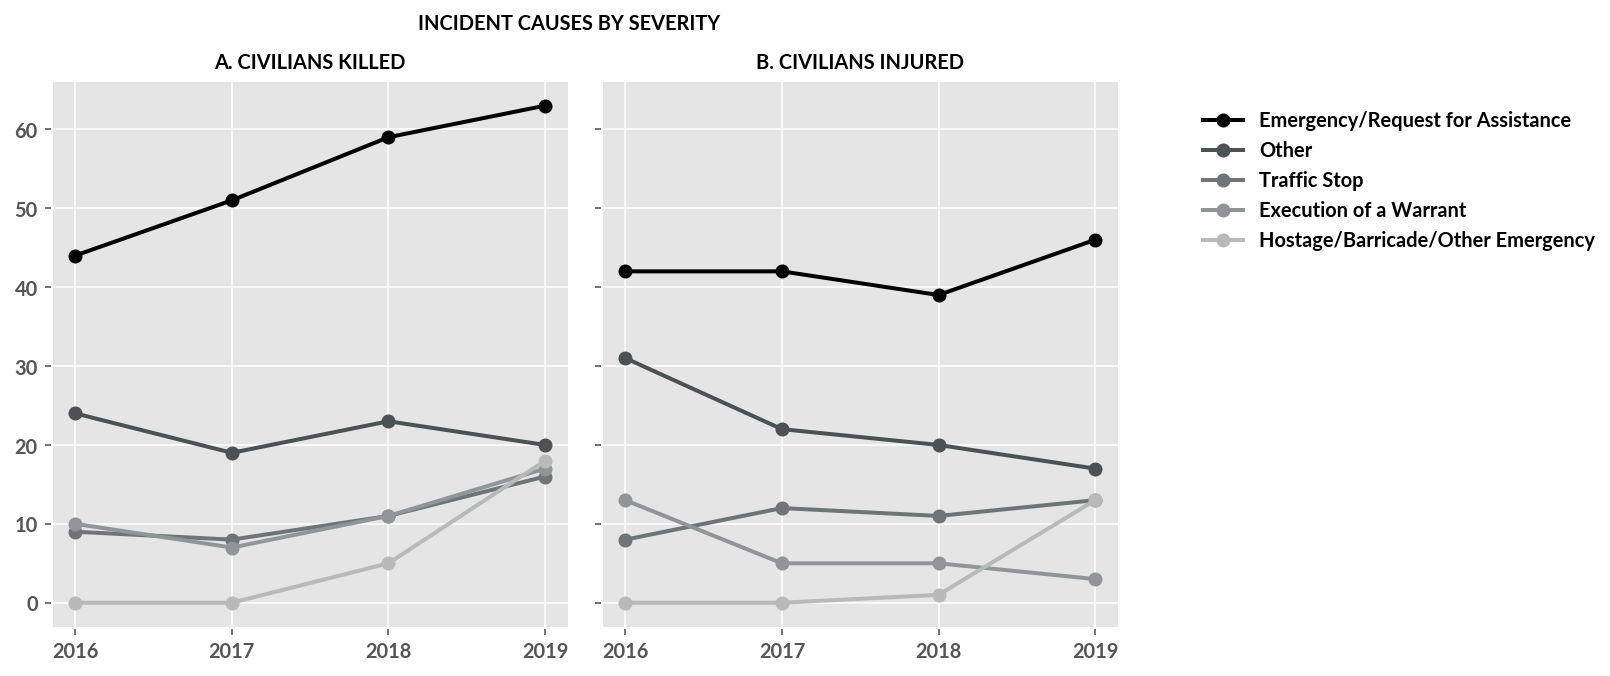

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5), sharey=True)
df_cd[df_cd['died']].groupby('year')[incident_causes_list_sorted].sum().plot(kind='line', color=cols_incident_causes, ax=axes[0], marker='o', lw=2, legend=False)
axes[0].set(xlabel='', xticks=years, xticklabels=years)
axes[0].set_title('A. Civilians killed'.upper(), fontsize=10)
df_cd[~df_cd['died']].groupby('year')[incident_causes_list_sorted].sum().plot(kind='line', color=cols_incident_causes, ax=axes[1], marker='o', lw=2, legend=False)
axes[1].set(xlabel='', xticks=years, xticklabels=years)
axes[1].set_title('B. Civilians injured'.upper(), fontsize=10)

fig.suptitle('Incident Causes by Severity'.upper(), fontsize=10, x=0.5, y=1.03)
fig.legend(incident_causes_list_sorted, ncol=1, bbox_to_anchor=(0.9, 0, 0.5, 0.9), fontsize=10)
fig.tight_layout()
fig.savefig('../Figures/Figures_Final/Figure_23.eps', bbox_inches='tight')

## The "Other" category

In [92]:
df_cd[incident_causes_list].sum()

Traffic Stop                          88
Emergency/Request for Assistance     386
Execution of a Warrant                71
Hostage/Barricade/Other Emergency     37
Other                                176
dtype: int64

## Overrepresentation of "other" in non-white population (metropolitan)

In [93]:
df_cd_incident_race_top5 = df_cd_top5.groupby('civilian_race')[incident_causes_list_sorted].sum().loc[race_list, incident_causes_list_sorted]
df_cd_incident_race_top5_pct = preprocess.pct(df_cd_incident_race_top5, 0)
df_cd_incident_race_top5

,Emergency/Request for Assistance,Other,Traffic Stop,Execution of a Warrant,Hostage/Barricade/Other Emergency
civilian_race,,,,,
WHITE,54,17,9,10,7
BLACK,66,48,11,12,2
HISPANIC,67,32,11,10,4
OTHER,7,2,2,1,2


### FIGURE 24. RACE DEMOGRAPHICS BY INCIDENT CAUSE (TOP 5 COUNTIES)

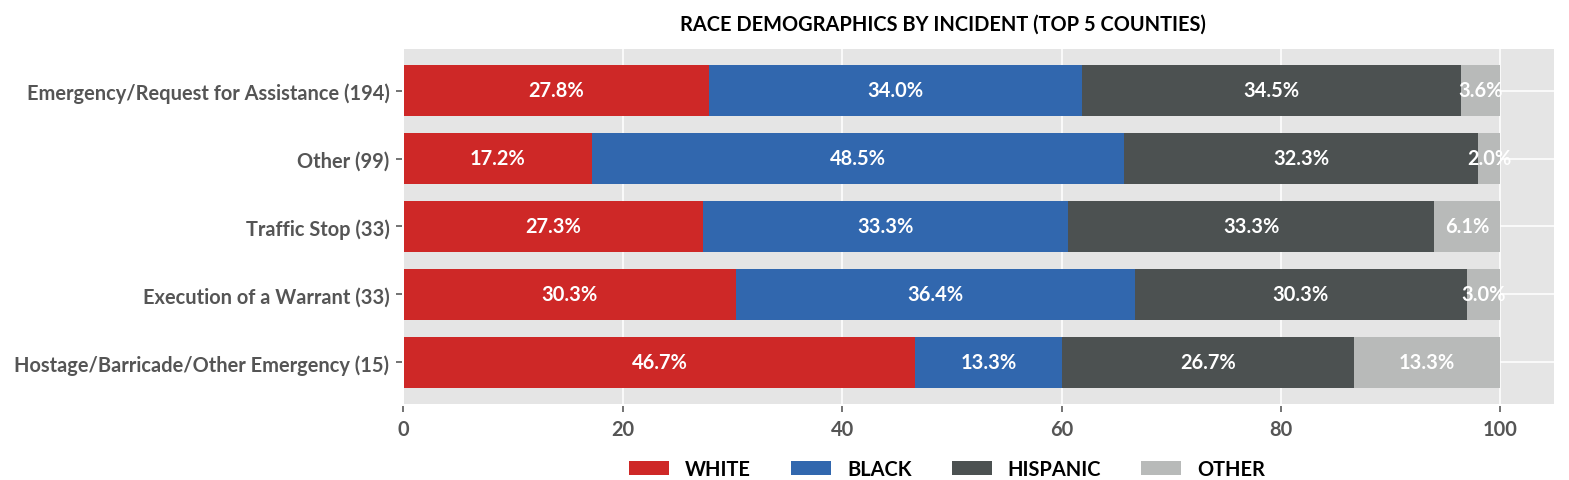

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(11, 3))
df_cd_incident_race_top5_pct.T[::-1].plot(kind='barh', stacked=True, ax=ax, legend=False, width=0.75, color=cols_race)
plot.annotate(ax, 'h', 'percent', fontsize=10)
ax.set_yticklabels([s + ' ({})'.format(n) for s, n in zip(df_cd_incident_race_top5.columns, 
                                                          df_cd_incident_race_top5.sum(axis=0).values)][::-1], fontsize=10)
fig.legend(race_list, ncol=4, bbox_to_anchor=(0.81, 0.09), fontsize=10)

fig.suptitle('Race demographics by incident (top 5 counties)'.upper(), fontsize=10, x=0.6, y=1.03)
fig.tight_layout()
fig.savefig('../Figures/Figures_Final/Figure_24.eps', bbox_inches='tight')

# 7. Report lag

Law enforcement agencies are required to file an incident report to the OAG within 30 days of a shooting. In 2017, the data set started to include the date that reports were submitted to the OAG. 

## Computing the lag by year

In [95]:
df_cd['delay_bin_label'].unique()

array([-1,  7,  6,  2,  5,  3,  4,  1,  8,  0,  9])

In [96]:
bins = [0, 7, 14, 30, 60, 90, 180, 360, 720]
binnames = ['Same Day'] + ['{} to {} Days'.format(bins[i]+1, bins[i+1]) for i in range(len(bins)-1)] + ['More than 720 Days']
print(len(bins), len(binnames), binnames)

9 10 ['Same Day', '1 to 7 Days', '8 to 14 Days', '15 to 30 Days', '31 to 60 Days', '61 to 90 Days', '91 to 180 Days', '181 to 360 Days', '361 to 720 Days', 'More than 720 Days']


In [97]:
df_cd_delay_year = df_cd[(df_cd['delay_bin_label'] != -1) & (df_cd['year'] > 2016)].groupby(['delay_bin_label', 'year'])['date_incident'].count().unstack().fillna(0)
df_cd_delay_year

year,2017,2018,2019
delay_bin_label,,,
0,3.0,5.0,3.0
1,44.0,51.0,65.0
2,35.0,38.0,37.0
3,54.0,60.0,62.0
4,13.0,12.0,11.0
5,1.0,2.0,1.0
6,4.0,2.0,6.0
7,0.0,1.0,0.0
8,2.0,1.0,0.0


### FIGURE 25. INCIDENTS BY LENGTH OF REPORT LAG

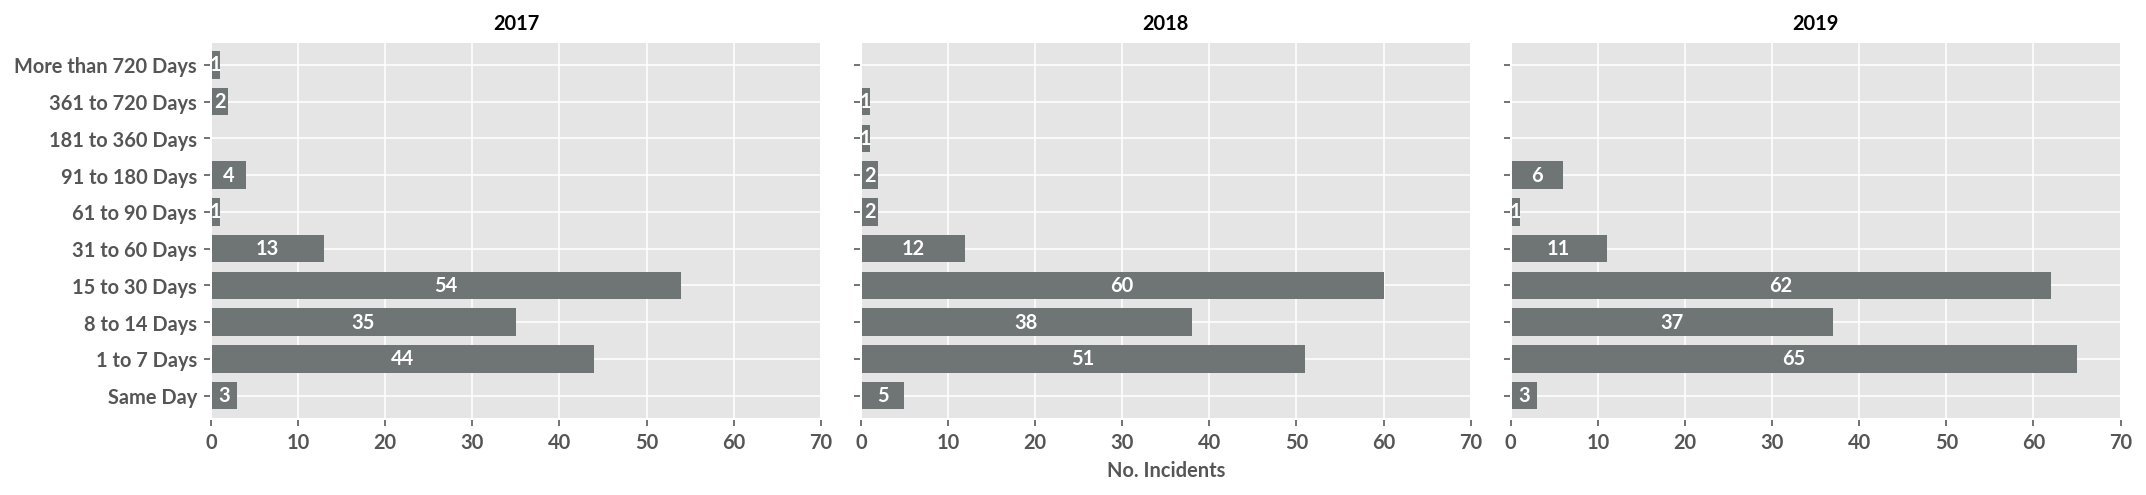

In [98]:
fig, axes = plt.subplots(1, len(years[1:]), figsize=(15, 3.5), sharey=True)
for i, (year, ax) in enumerate(zip(years[1:], axes)):
    
    df_cd_delay_year[year].plot(kind='barh', color=cols_bar, ax=ax, legend=False, width=0.75)
    ax.set(xlim=(0,70), ylabel='')
    ax.set_title(year, fontsize=10)
    if i == 1:
        ax.set(xlabel='No. Incidents')
    else:
        ax.set_xlabel(None)
    ax.set_yticklabels(binnames, fontsize=10)
    plot.annotate(ax, 'h', fontsize=10)
    
fig.tight_layout()
fig.savefig('../Figures/Figures_Final/Figure_25.eps')

## Counties with most number of delayed reports

In [99]:
df_cd['delayed_reports'] = df_cd['delay_days']>30
top5_locs_delays = df_cd[df_cd['delayed_reports']].groupby(['incident_county'])['date_incident'].count().sort_values(ascending=False)[:5].index
print(top5_locs_delays)

Index(['HARRIS', 'BEXAR', 'TARRANT', 'WEBB', 'ECTOR'], dtype='object', name='incident_county')


### FIGURE 26. INCIDENTS BY LENGTH OF REPORT LAG (TOP 5 COUNTIES)

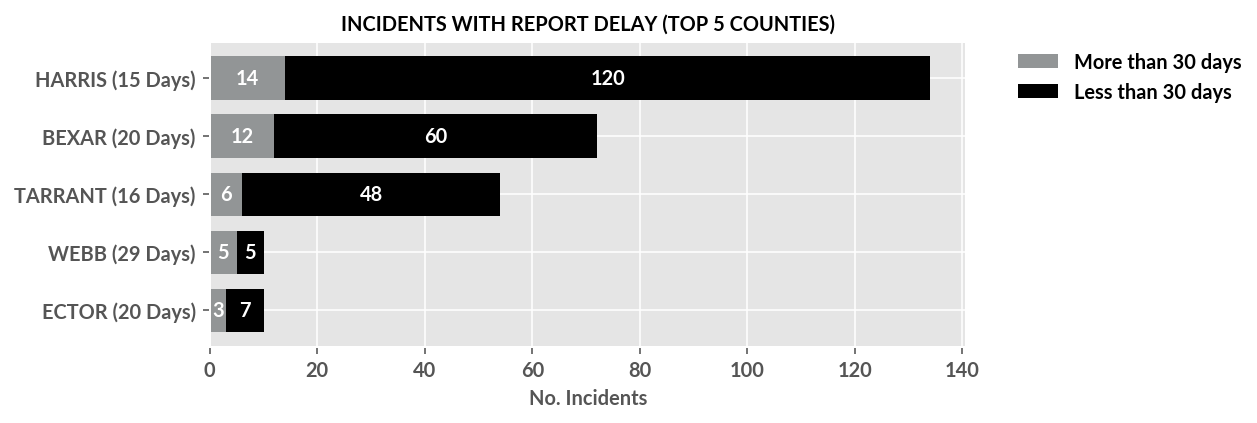

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

df_cd_top5_delays = df_cd[df_cd['incident_county'].isin(top5_locs_delays)].groupby(['incident_county','delayed_reports'])['date_incident'].count().unstack()
df_cd_top5_delays.loc[top5_locs_delays, [1, 0]][::-1].plot.barh(stacked=True, legend=False, rot=0, color=cols_oag_tji, ax=ax, width=0.75)

medians = df_cd.groupby('incident_county')['delay_days'].median().loc[top5_locs_delays]
yticklabels = ['{} ({:.0f} Days)'.format(city, median) for city, median in medians.items()]

ax.set(xlabel='No. Incidents', ylabel='', yticklabels=yticklabels[::-1])
ax.set_title('incidents with report delay (top 5 counties)'.upper(), fontsize=10)
plot.annotate(ax, 'h', fontsize=10)

fig.legend(['More than 30 days', 'Less than 30 days'], bbox_to_anchor=(0.75, 0, 0.5, 0.9), fontsize=10)
fig.tight_layout()
fig.savefig('../Figures/Figures_Final/Figure_26.eps', bbox_inches='tight')

In [101]:
df_cd.groupby('incident_county')['delay_days'].median().loc[top5_locs_delays]

incident_county
HARRIS     15.0
BEXAR      19.5
TARRANT    16.0
WEBB       29.0
ECTOR      20.5
Name: delay_days, dtype: float64

## Officer vs. civilian report lag

In [102]:
print(df_cd['delay_days'].median())
print(df_os['delay_days'].median())

14.0
21.0
